https://pythonprogramming.net/tensorboard-optimizing-models-deep-learning-python-tensorflow-keras/

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import numpy as np


In [2]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
X = np.array(X)
y = np.array(y)

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f"{int(time.time())}-conv-{conv_layer}-nodes-{layer_size}-dense-{dense_layer}"
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.2,
                      callbacks=[tensorboard])
            model.save(f"{NAME}.model")

1677680797-conv-1-nodes-32-dense-0
Epoch 1/10
619/619 [==============================] - 6s 9ms/step - loss: 0.6153 - accuracy: 0.6622 - val_loss: 0.5579 - val_accuracy: 0.7220
Epoch 2/10
619/619 [==============================] - 5s 8ms/step - loss: 0.5368 - accuracy: 0.7346 - val_loss: 0.5329 - val_accuracy: 0.7397
Epoch 3/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4989 - accuracy: 0.7605 - val_loss: 0.5404 - val_accuracy: 0.7274
Epoch 4/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4681 - accuracy: 0.7804 - val_loss: 0.5209 - val_accuracy: 0.7466
Epoch 5/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4442 - accuracy: 0.7949 - val_loss: 0.5200 - val_accuracy: 0.7492
Epoch 6/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4226 - accuracy: 0.8069 - val_loss: 0.5373 - val_accuracy: 0.7424
Epoch 7/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4000 - accuracy: 0.8205 - val_loss: 

INFO:tensorflow:Assets written to: 1677680797-conv-1-nodes-32-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677680797-conv-1-nodes-32-dense-0.model\assets


1677680852-conv-2-nodes-32-dense-0
Epoch 1/10
619/619 [==============================] - 6s 9ms/step - loss: 0.5974 - accuracy: 0.6687 - val_loss: 0.5378 - val_accuracy: 0.7323
Epoch 2/10
619/619 [==============================] - 5s 9ms/step - loss: 0.5028 - accuracy: 0.7559 - val_loss: 0.4923 - val_accuracy: 0.7644
Epoch 3/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4669 - accuracy: 0.7782 - val_loss: 0.4729 - val_accuracy: 0.7812
Epoch 4/10
619/619 [==============================] - 5s 9ms/step - loss: 0.4373 - accuracy: 0.7983 - val_loss: 0.4507 - val_accuracy: 0.7945
Epoch 5/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4188 - accuracy: 0.8072 - val_loss: 0.4438 - val_accuracy: 0.7909
Epoch 6/10
619/619 [==============================] - 6s 9ms/step - loss: 0.3964 - accuracy: 0.8206 - val_loss: 0.4312 - val_accuracy: 0.8028
Epoch 7/10
619/619 [==============================] - 5s 8ms/step - loss: 0.3782 - accuracy: 0.8295 - val_loss: 

INFO:tensorflow:Assets written to: 1677680852-conv-2-nodes-32-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677680852-conv-2-nodes-32-dense-0.model\assets


1677680909-conv-3-nodes-32-dense-0
Epoch 1/10
619/619 [==============================] - 6s 9ms/step - loss: 0.6365 - accuracy: 0.6282 - val_loss: 0.5704 - val_accuracy: 0.7070
Epoch 2/10
619/619 [==============================] - 6s 9ms/step - loss: 0.5366 - accuracy: 0.7300 - val_loss: 0.4974 - val_accuracy: 0.7636
Epoch 3/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4786 - accuracy: 0.7724 - val_loss: 0.4512 - val_accuracy: 0.7963
Epoch 4/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4457 - accuracy: 0.7914 - val_loss: 0.4439 - val_accuracy: 0.7939
Epoch 5/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4146 - accuracy: 0.8132 - val_loss: 0.4090 - val_accuracy: 0.8149
Epoch 6/10
619/619 [==============================] - 6s 9ms/step - loss: 0.3898 - accuracy: 0.8250 - val_loss: 0.4063 - val_accuracy: 0.8149
Epoch 7/10
619/619 [==============================] - 6s 9ms/step - loss: 0.3697 - accuracy: 0.8334 - val_loss: 0

INFO:tensorflow:Assets written to: 1677680909-conv-3-nodes-32-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677680909-conv-3-nodes-32-dense-0.model\assets


1677680969-conv-1-nodes-64-dense-0
Epoch 1/10
619/619 [==============================] - 7s 9ms/step - loss: 0.6144 - accuracy: 0.6641 - val_loss: 0.5721 - val_accuracy: 0.7189
Epoch 2/10
619/619 [==============================] - 5s 8ms/step - loss: 0.5257 - accuracy: 0.7417 - val_loss: 0.5249 - val_accuracy: 0.7480
Epoch 3/10
619/619 [==============================] - 5s 9ms/step - loss: 0.4867 - accuracy: 0.7681 - val_loss: 0.5133 - val_accuracy: 0.7521
Epoch 4/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4556 - accuracy: 0.7833 - val_loss: 0.5169 - val_accuracy: 0.7559
Epoch 5/10
619/619 [==============================] - 5s 9ms/step - loss: 0.4269 - accuracy: 0.8003 - val_loss: 0.5570 - val_accuracy: 0.7321
Epoch 6/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4003 - accuracy: 0.8168 - val_loss: 0.5110 - val_accuracy: 0.7549
Epoch 7/10
619/619 [==============================] - 6s 10ms/step - loss: 0.3733 - accuracy: 0.8363 - val_loss: 

INFO:tensorflow:Assets written to: 1677680969-conv-1-nodes-64-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677680969-conv-1-nodes-64-dense-0.model\assets


1677681027-conv-2-nodes-64-dense-0
Epoch 1/10
619/619 [==============================] - 8s 11ms/step - loss: 0.6153 - accuracy: 0.6501 - val_loss: 0.5354 - val_accuracy: 0.7377
Epoch 2/10
619/619 [==============================] - 8s 12ms/step - loss: 0.5074 - accuracy: 0.7533 - val_loss: 0.4907 - val_accuracy: 0.7672
Epoch 3/10
619/619 [==============================] - 8s 13ms/step - loss: 0.4598 - accuracy: 0.7825 - val_loss: 0.5108 - val_accuracy: 0.7593
Epoch 4/10
619/619 [==============================] - 7s 11ms/step - loss: 0.4305 - accuracy: 0.7982 - val_loss: 0.4448 - val_accuracy: 0.7981
Epoch 5/10
619/619 [==============================] - 7s 11ms/step - loss: 0.4011 - accuracy: 0.8190 - val_loss: 0.4328 - val_accuracy: 0.8066
Epoch 6/10
619/619 [==============================] - 7s 12ms/step - loss: 0.3745 - accuracy: 0.8313 - val_loss: 0.4328 - val_accuracy: 0.7989
Epoch 7/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3559 - accuracy: 0.8433 - val_

INFO:tensorflow:Assets written to: 1677681027-conv-2-nodes-64-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677681027-conv-2-nodes-64-dense-0.model\assets


1677681101-conv-3-nodes-64-dense-0
Epoch 1/10
619/619 [==============================] - 8s 12ms/step - loss: 0.6319 - accuracy: 0.6286 - val_loss: 0.5610 - val_accuracy: 0.7098
Epoch 2/10
619/619 [==============================] - 7s 12ms/step - loss: 0.5035 - accuracy: 0.7568 - val_loss: 0.4624 - val_accuracy: 0.7868
Epoch 3/10
619/619 [==============================] - 7s 11ms/step - loss: 0.4463 - accuracy: 0.7917 - val_loss: 0.4269 - val_accuracy: 0.8060
Epoch 4/10
619/619 [==============================] - 8s 13ms/step - loss: 0.3977 - accuracy: 0.8166 - val_loss: 0.4186 - val_accuracy: 0.8113
Epoch 5/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3621 - accuracy: 0.8383 - val_loss: 0.3784 - val_accuracy: 0.8240
Epoch 6/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3354 - accuracy: 0.8511 - val_loss: 0.3818 - val_accuracy: 0.8244
Epoch 7/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3045 - accuracy: 0.8666 - val_

INFO:tensorflow:Assets written to: 1677681101-conv-3-nodes-64-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677681101-conv-3-nodes-64-dense-0.model\assets


1677681173-conv-1-nodes-128-dense-0
Epoch 1/10
619/619 [==============================] - 9s 14ms/step - loss: 0.6181 - accuracy: 0.6607 - val_loss: 0.5668 - val_accuracy: 0.7026
Epoch 2/10
619/619 [==============================] - 8s 13ms/step - loss: 0.5241 - accuracy: 0.7432 - val_loss: 0.5272 - val_accuracy: 0.7391
Epoch 3/10
619/619 [==============================] - 7s 12ms/step - loss: 0.4806 - accuracy: 0.7700 - val_loss: 0.5270 - val_accuracy: 0.7472
Epoch 4/10
619/619 [==============================] - 8s 12ms/step - loss: 0.4417 - accuracy: 0.7922 - val_loss: 0.5647 - val_accuracy: 0.7300
Epoch 5/10
619/619 [==============================] - 8s 12ms/step - loss: 0.4102 - accuracy: 0.8140 - val_loss: 0.5117 - val_accuracy: 0.7585
Epoch 6/10
619/619 [==============================] - 8s 12ms/step - loss: 0.3745 - accuracy: 0.8325 - val_loss: 0.5785 - val_accuracy: 0.7290
Epoch 7/10
619/619 [==============================] - 8s 12ms/step - loss: 0.3409 - accuracy: 0.8509 - val

INFO:tensorflow:Assets written to: 1677681173-conv-1-nodes-128-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677681173-conv-1-nodes-128-dense-0.model\assets


1677681253-conv-2-nodes-128-dense-0
Epoch 1/10
619/619 [==============================] - 11s 17ms/step - loss: 0.6491 - accuracy: 0.6165 - val_loss: 0.5640 - val_accuracy: 0.7104
Epoch 2/10
619/619 [==============================] - 10s 16ms/step - loss: 0.5445 - accuracy: 0.7269 - val_loss: 0.4947 - val_accuracy: 0.7688
Epoch 3/10
619/619 [==============================] - 10s 16ms/step - loss: 0.4858 - accuracy: 0.7677 - val_loss: 0.5073 - val_accuracy: 0.7456
Epoch 4/10
619/619 [==============================] - 10s 16ms/step - loss: 0.4461 - accuracy: 0.7927 - val_loss: 0.4560 - val_accuracy: 0.7893
Epoch 5/10
619/619 [==============================] - 10s 16ms/step - loss: 0.4155 - accuracy: 0.8116 - val_loss: 0.4498 - val_accuracy: 0.7925
Epoch 6/10
619/619 [==============================] - 11s 18ms/step - loss: 0.3864 - accuracy: 0.8257 - val_loss: 0.4370 - val_accuracy: 0.8012
Epoch 7/10
619/619 [==============================] - 10s 16ms/step - loss: 0.3608 - accuracy: 0.839

INFO:tensorflow:Assets written to: 1677681253-conv-2-nodes-128-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677681253-conv-2-nodes-128-dense-0.model\assets


1677681358-conv-3-nodes-128-dense-0
Epoch 1/10
619/619 [==============================] - 12s 18ms/step - loss: 0.6325 - accuracy: 0.6335 - val_loss: 0.5712 - val_accuracy: 0.7038
Epoch 2/10
619/619 [==============================] - 11s 17ms/step - loss: 0.5144 - accuracy: 0.7491 - val_loss: 0.4837 - val_accuracy: 0.7717
Epoch 3/10
619/619 [==============================] - 11s 18ms/step - loss: 0.4439 - accuracy: 0.7960 - val_loss: 0.4529 - val_accuracy: 0.7834
Epoch 4/10
619/619 [==============================] - 11s 18ms/step - loss: 0.3990 - accuracy: 0.8183 - val_loss: 0.3919 - val_accuracy: 0.8268
Epoch 5/10
619/619 [==============================] - 11s 18ms/step - loss: 0.3538 - accuracy: 0.8424 - val_loss: 0.3841 - val_accuracy: 0.8278
Epoch 6/10
619/619 [==============================] - 11s 18ms/step - loss: 0.3184 - accuracy: 0.8607 - val_loss: 0.3653 - val_accuracy: 0.8369
Epoch 7/10
619/619 [==============================] - 11s 18ms/step - loss: 0.2844 - accuracy: 0.878

INFO:tensorflow:Assets written to: 1677681358-conv-3-nodes-128-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677681358-conv-3-nodes-128-dense-0.model\assets


1677681470-conv-1-nodes-32-dense-1
Epoch 1/10
619/619 [==============================] - 6s 8ms/step - loss: 0.6089 - accuracy: 0.6652 - val_loss: 0.5497 - val_accuracy: 0.7349
Epoch 2/10
619/619 [==============================] - 5s 9ms/step - loss: 0.5237 - accuracy: 0.7414 - val_loss: 0.5241 - val_accuracy: 0.7359
Epoch 3/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4752 - accuracy: 0.7732 - val_loss: 0.5179 - val_accuracy: 0.7466
Epoch 4/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4276 - accuracy: 0.8011 - val_loss: 0.5102 - val_accuracy: 0.7488
Epoch 5/10
619/619 [==============================] - 5s 8ms/step - loss: 0.3834 - accuracy: 0.8288 - val_loss: 0.5215 - val_accuracy: 0.7587
Epoch 6/10
619/619 [==============================] - 5s 8ms/step - loss: 0.3300 - accuracy: 0.8536 - val_loss: 0.5544 - val_accuracy: 0.7492
Epoch 7/10
619/619 [==============================] - 5s 8ms/step - loss: 0.2738 - accuracy: 0.8855 - val_loss: 0

INFO:tensorflow:Assets written to: 1677681470-conv-1-nodes-32-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681470-conv-1-nodes-32-dense-1.model\assets


1677681523-conv-2-nodes-32-dense-1
Epoch 1/10
619/619 [==============================] - 6s 9ms/step - loss: 0.6292 - accuracy: 0.6349 - val_loss: 0.5552 - val_accuracy: 0.7123
Epoch 2/10
619/619 [==============================] - 5s 8ms/step - loss: 0.5330 - accuracy: 0.7347 - val_loss: 0.4884 - val_accuracy: 0.7614
Epoch 3/10
619/619 [==============================] - 5s 9ms/step - loss: 0.4705 - accuracy: 0.7753 - val_loss: 0.4909 - val_accuracy: 0.7608
Epoch 4/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4176 - accuracy: 0.8077 - val_loss: 0.4488 - val_accuracy: 0.7905
Epoch 5/10
619/619 [==============================] - 5s 9ms/step - loss: 0.3679 - accuracy: 0.8363 - val_loss: 0.4936 - val_accuracy: 0.7717
Epoch 6/10
619/619 [==============================] - 5s 8ms/step - loss: 0.3153 - accuracy: 0.8626 - val_loss: 0.4505 - val_accuracy: 0.7971
Epoch 7/10
619/619 [==============================] - 5s 8ms/step - loss: 0.2607 - accuracy: 0.8885 - val_loss: 0

INFO:tensorflow:Assets written to: 1677681523-conv-2-nodes-32-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681523-conv-2-nodes-32-dense-1.model\assets


1677681578-conv-3-nodes-32-dense-1
Epoch 1/10
619/619 [==============================] - 6s 9ms/step - loss: 0.6383 - accuracy: 0.6282 - val_loss: 0.5875 - val_accuracy: 0.6931
Epoch 2/10
619/619 [==============================] - 5s 9ms/step - loss: 0.5285 - accuracy: 0.7380 - val_loss: 0.4845 - val_accuracy: 0.7701
Epoch 3/10
619/619 [==============================] - 5s 9ms/step - loss: 0.4659 - accuracy: 0.7795 - val_loss: 0.4388 - val_accuracy: 0.8010
Epoch 4/10
619/619 [==============================] - 5s 9ms/step - loss: 0.4311 - accuracy: 0.7964 - val_loss: 0.4366 - val_accuracy: 0.7961
Epoch 5/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4050 - accuracy: 0.8159 - val_loss: 0.4034 - val_accuracy: 0.8147
Epoch 6/10
619/619 [==============================] - 5s 9ms/step - loss: 0.3779 - accuracy: 0.8265 - val_loss: 0.4382 - val_accuracy: 0.8008
Epoch 7/10
619/619 [==============================] - 6s 9ms/step - loss: 0.3530 - accuracy: 0.8422 - val_loss: 0

INFO:tensorflow:Assets written to: 1677681578-conv-3-nodes-32-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681578-conv-3-nodes-32-dense-1.model\assets


1677681638-conv-1-nodes-64-dense-1
Epoch 1/10
619/619 [==============================] - 7s 10ms/step - loss: 0.6529 - accuracy: 0.6141 - val_loss: 0.5895 - val_accuracy: 0.6959
Epoch 2/10
619/619 [==============================] - 6s 10ms/step - loss: 0.5531 - accuracy: 0.7201 - val_loss: 0.5511 - val_accuracy: 0.7199
Epoch 3/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4988 - accuracy: 0.7592 - val_loss: 0.5259 - val_accuracy: 0.7371
Epoch 4/10
619/619 [==============================] - 6s 9ms/step - loss: 0.4607 - accuracy: 0.7810 - val_loss: 0.5126 - val_accuracy: 0.7563
Epoch 5/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4275 - accuracy: 0.7992 - val_loss: 0.5139 - val_accuracy: 0.7482
Epoch 6/10
619/619 [==============================] - 6s 10ms/step - loss: 0.3943 - accuracy: 0.8199 - val_loss: 0.5462 - val_accuracy: 0.7448
Epoch 7/10
619/619 [==============================] - 6s 10ms/step - loss: 0.3641 - accuracy: 0.8351 - val_lo

INFO:tensorflow:Assets written to: 1677681638-conv-1-nodes-64-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681638-conv-1-nodes-64-dense-1.model\assets


1677681700-conv-2-nodes-64-dense-1
Epoch 1/10
619/619 [==============================] - 7s 11ms/step - loss: 0.6439 - accuracy: 0.6172 - val_loss: 0.5876 - val_accuracy: 0.6933
Epoch 2/10
619/619 [==============================] - 7s 11ms/step - loss: 0.5604 - accuracy: 0.7113 - val_loss: 0.5438 - val_accuracy: 0.7272
Epoch 3/10
619/619 [==============================] - 7s 11ms/step - loss: 0.4986 - accuracy: 0.7593 - val_loss: 0.5006 - val_accuracy: 0.7571
Epoch 4/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4469 - accuracy: 0.7885 - val_loss: 0.4768 - val_accuracy: 0.7725
Epoch 5/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3996 - accuracy: 0.8183 - val_loss: 0.4910 - val_accuracy: 0.7648
Epoch 6/10
619/619 [==============================] - 6s 10ms/step - loss: 0.3474 - accuracy: 0.8435 - val_loss: 0.4883 - val_accuracy: 0.7812
Epoch 7/10
619/619 [==============================] - 7s 11ms/step - loss: 0.2845 - accuracy: 0.8798 - val_

INFO:tensorflow:Assets written to: 1677681700-conv-2-nodes-64-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681700-conv-2-nodes-64-dense-1.model\assets


1677681768-conv-3-nodes-64-dense-1
Epoch 1/10
619/619 [==============================] - 8s 12ms/step - loss: 0.6276 - accuracy: 0.6347 - val_loss: 0.5405 - val_accuracy: 0.7228
Epoch 2/10
619/619 [==============================] - 7s 11ms/step - loss: 0.4981 - accuracy: 0.7579 - val_loss: 0.4684 - val_accuracy: 0.7838
Epoch 3/10
619/619 [==============================] - 7s 12ms/step - loss: 0.4413 - accuracy: 0.7931 - val_loss: 0.4386 - val_accuracy: 0.8040
Epoch 4/10
619/619 [==============================] - 7s 12ms/step - loss: 0.3951 - accuracy: 0.8186 - val_loss: 0.4244 - val_accuracy: 0.8056
Epoch 5/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3504 - accuracy: 0.8419 - val_loss: 0.3779 - val_accuracy: 0.8287
Epoch 6/10
619/619 [==============================] - 8s 13ms/step - loss: 0.3059 - accuracy: 0.8660 - val_loss: 0.3639 - val_accuracy: 0.8367
Epoch 7/10
619/619 [==============================] - 7s 11ms/step - loss: 0.2815 - accuracy: 0.8787 - val_

INFO:tensorflow:Assets written to: 1677681768-conv-3-nodes-64-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681768-conv-3-nodes-64-dense-1.model\assets


1677681842-conv-1-nodes-128-dense-1
Epoch 1/10
619/619 [==============================] - 11s 16ms/step - loss: 0.6291 - accuracy: 0.6671 - val_loss: 0.5553 - val_accuracy: 0.7169
Epoch 2/10
619/619 [==============================] - 9s 15ms/step - loss: 0.5098 - accuracy: 0.7513 - val_loss: 0.5384 - val_accuracy: 0.7270
Epoch 3/10
619/619 [==============================] - 9s 15ms/step - loss: 0.4303 - accuracy: 0.7986 - val_loss: 0.5397 - val_accuracy: 0.7446
Epoch 4/10
619/619 [==============================] - 9s 15ms/step - loss: 0.3320 - accuracy: 0.8536 - val_loss: 0.5370 - val_accuracy: 0.7519
Epoch 5/10
619/619 [==============================] - 10s 16ms/step - loss: 0.2207 - accuracy: 0.9117 - val_loss: 0.6357 - val_accuracy: 0.7494
Epoch 6/10
619/619 [==============================] - 10s 16ms/step - loss: 0.1284 - accuracy: 0.9532 - val_loss: 0.8036 - val_accuracy: 0.7395
Epoch 7/10
619/619 [==============================] - 9s 15ms/step - loss: 0.0772 - accuracy: 0.9752 - 

INFO:tensorflow:Assets written to: 1677681842-conv-1-nodes-128-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681842-conv-1-nodes-128-dense-1.model\assets


1677681940-conv-2-nodes-128-dense-1
Epoch 1/10
619/619 [==============================] - 11s 17ms/step - loss: 0.6309 - accuracy: 0.6380 - val_loss: 0.5974 - val_accuracy: 0.6822
Epoch 2/10
619/619 [==============================] - 11s 18ms/step - loss: 0.5220 - accuracy: 0.7405 - val_loss: 0.4878 - val_accuracy: 0.7707
Epoch 3/10
619/619 [==============================] - 10s 17ms/step - loss: 0.4674 - accuracy: 0.7764 - val_loss: 0.5158 - val_accuracy: 0.7543
Epoch 4/10
619/619 [==============================] - 11s 17ms/step - loss: 0.4202 - accuracy: 0.8050 - val_loss: 0.4450 - val_accuracy: 0.7927
Epoch 5/10
619/619 [==============================] - 10s 17ms/step - loss: 0.3757 - accuracy: 0.8300 - val_loss: 0.4525 - val_accuracy: 0.7985
Epoch 6/10
619/619 [==============================] - 10s 17ms/step - loss: 0.3187 - accuracy: 0.8607 - val_loss: 0.4561 - val_accuracy: 0.8032
Epoch 7/10
619/619 [==============================] - 10s 17ms/step - loss: 0.2528 - accuracy: 0.894

INFO:tensorflow:Assets written to: 1677681940-conv-2-nodes-128-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677681940-conv-2-nodes-128-dense-1.model\assets


1677682047-conv-3-nodes-128-dense-1
Epoch 1/10
619/619 [==============================] - 12s 19ms/step - loss: 0.6715 - accuracy: 0.5762 - val_loss: 0.6115 - val_accuracy: 0.6830
Epoch 2/10
619/619 [==============================] - 11s 18ms/step - loss: 0.5697 - accuracy: 0.7044 - val_loss: 0.5387 - val_accuracy: 0.7307
Epoch 3/10
619/619 [==============================] - 11s 18ms/step - loss: 0.4834 - accuracy: 0.7682 - val_loss: 0.4869 - val_accuracy: 0.7755
Epoch 4/10
619/619 [==============================] - 11s 18ms/step - loss: 0.4233 - accuracy: 0.8035 - val_loss: 0.4879 - val_accuracy: 0.7668
Epoch 5/10
619/619 [==============================] - 11s 18ms/step - loss: 0.3750 - accuracy: 0.8292 - val_loss: 0.4045 - val_accuracy: 0.8139
Epoch 6/10
619/619 [==============================] - 11s 18ms/step - loss: 0.3266 - accuracy: 0.8575 - val_loss: 0.4243 - val_accuracy: 0.8127
Epoch 7/10
619/619 [==============================] - 11s 17ms/step - loss: 0.2749 - accuracy: 0.880

INFO:tensorflow:Assets written to: 1677682047-conv-3-nodes-128-dense-1.model\assets


INFO:tensorflow:Assets written to: 1677682047-conv-3-nodes-128-dense-1.model\assets


1677682160-conv-1-nodes-32-dense-2
Epoch 1/10
619/619 [==============================] - 6s 8ms/step - loss: 0.6001 - accuracy: 0.6708 - val_loss: 0.5638 - val_accuracy: 0.7058
Epoch 2/10
619/619 [==============================] - 5s 8ms/step - loss: 0.5051 - accuracy: 0.7563 - val_loss: 0.6017 - val_accuracy: 0.6983
Epoch 3/10
619/619 [==============================] - 5s 8ms/step - loss: 0.4302 - accuracy: 0.7989 - val_loss: 0.5342 - val_accuracy: 0.7492
Epoch 4/10
619/619 [==============================] - 5s 8ms/step - loss: 0.3465 - accuracy: 0.8483 - val_loss: 0.5809 - val_accuracy: 0.7395
Epoch 5/10
619/619 [==============================] - 5s 8ms/step - loss: 0.2616 - accuracy: 0.8903 - val_loss: 0.6390 - val_accuracy: 0.7432
Epoch 6/10
619/619 [==============================] - 5s 8ms/step - loss: 0.1720 - accuracy: 0.9314 - val_loss: 0.8163 - val_accuracy: 0.7244
Epoch 7/10
619/619 [==============================] - 5s 8ms/step - loss: 0.1107 - accuracy: 0.9588 - val_loss: 0

INFO:tensorflow:Assets written to: 1677682160-conv-1-nodes-32-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682160-conv-1-nodes-32-dense-2.model\assets


1677682213-conv-2-nodes-32-dense-2
Epoch 1/10
619/619 [==============================] - 7s 10ms/step - loss: 0.6272 - accuracy: 0.6394 - val_loss: 0.5478 - val_accuracy: 0.7169
Epoch 2/10
619/619 [==============================] - 6s 10ms/step - loss: 0.5168 - accuracy: 0.7505 - val_loss: 0.5105 - val_accuracy: 0.7614
Epoch 3/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4558 - accuracy: 0.7881 - val_loss: 0.4587 - val_accuracy: 0.7882
Epoch 4/10
619/619 [==============================] - 5s 9ms/step - loss: 0.4004 - accuracy: 0.8173 - val_loss: 0.4422 - val_accuracy: 0.7996
Epoch 5/10
619/619 [==============================] - 5s 9ms/step - loss: 0.3510 - accuracy: 0.8446 - val_loss: 0.4353 - val_accuracy: 0.8048
Epoch 6/10
619/619 [==============================] - 5s 9ms/step - loss: 0.3005 - accuracy: 0.8710 - val_loss: 0.4858 - val_accuracy: 0.8014
Epoch 7/10
619/619 [==============================] - 5s 9ms/step - loss: 0.2508 - accuracy: 0.8949 - val_loss

INFO:tensorflow:Assets written to: 1677682213-conv-2-nodes-32-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682213-conv-2-nodes-32-dense-2.model\assets


1677682271-conv-3-nodes-32-dense-2
Epoch 1/10
619/619 [==============================] - 8s 11ms/step - loss: 0.6271 - accuracy: 0.6358 - val_loss: 0.5453 - val_accuracy: 0.7199
Epoch 2/10
619/619 [==============================] - 6s 10ms/step - loss: 0.5176 - accuracy: 0.7437 - val_loss: 0.4767 - val_accuracy: 0.7783
Epoch 3/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4626 - accuracy: 0.7810 - val_loss: 0.4501 - val_accuracy: 0.7893
Epoch 4/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4169 - accuracy: 0.8069 - val_loss: 0.4348 - val_accuracy: 0.8016
Epoch 5/10
619/619 [==============================] - 6s 9ms/step - loss: 0.3805 - accuracy: 0.8264 - val_loss: 0.4536 - val_accuracy: 0.7893
Epoch 6/10
619/619 [==============================] - 6s 9ms/step - loss: 0.3472 - accuracy: 0.8476 - val_loss: 0.4002 - val_accuracy: 0.8206
Epoch 7/10
619/619 [==============================] - 6s 9ms/step - loss: 0.3127 - accuracy: 0.8648 - val_los

INFO:tensorflow:Assets written to: 1677682271-conv-3-nodes-32-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682271-conv-3-nodes-32-dense-2.model\assets


1677682335-conv-1-nodes-64-dense-2
Epoch 1/10
619/619 [==============================] - 7s 10ms/step - loss: 0.6102 - accuracy: 0.6625 - val_loss: 0.5803 - val_accuracy: 0.7034
Epoch 2/10
619/619 [==============================] - 6s 10ms/step - loss: 0.5095 - accuracy: 0.7542 - val_loss: 0.5406 - val_accuracy: 0.7270
Epoch 3/10
619/619 [==============================] - 6s 10ms/step - loss: 0.4465 - accuracy: 0.7890 - val_loss: 0.5180 - val_accuracy: 0.7503
Epoch 4/10
619/619 [==============================] - 6s 10ms/step - loss: 0.3790 - accuracy: 0.8292 - val_loss: 0.6228 - val_accuracy: 0.7381
Epoch 5/10
619/619 [==============================] - 6s 10ms/step - loss: 0.2960 - accuracy: 0.8712 - val_loss: 0.6578 - val_accuracy: 0.7363
Epoch 6/10
619/619 [==============================] - 6s 10ms/step - loss: 0.2139 - accuracy: 0.9116 - val_loss: 0.7341 - val_accuracy: 0.7333
Epoch 7/10
619/619 [==============================] - 6s 10ms/step - loss: 0.1381 - accuracy: 0.9471 - val_

INFO:tensorflow:Assets written to: 1677682335-conv-1-nodes-64-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682335-conv-1-nodes-64-dense-2.model\assets


1677682401-conv-2-nodes-64-dense-2
Epoch 1/10
619/619 [==============================] - 8s 11ms/step - loss: 0.6323 - accuracy: 0.6303 - val_loss: 0.5440 - val_accuracy: 0.7292
Epoch 2/10
619/619 [==============================] - 7s 11ms/step - loss: 0.5146 - accuracy: 0.7486 - val_loss: 0.4967 - val_accuracy: 0.7610
Epoch 3/10
619/619 [==============================] - 7s 11ms/step - loss: 0.4496 - accuracy: 0.7876 - val_loss: 0.4573 - val_accuracy: 0.7838
Epoch 4/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3867 - accuracy: 0.8258 - val_loss: 0.4502 - val_accuracy: 0.7969
Epoch 5/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3215 - accuracy: 0.8576 - val_loss: 0.4692 - val_accuracy: 0.7955
Epoch 6/10
619/619 [==============================] - 7s 11ms/step - loss: 0.2478 - accuracy: 0.8959 - val_loss: 0.5864 - val_accuracy: 0.7840
Epoch 7/10
619/619 [==============================] - 7s 11ms/step - loss: 0.1809 - accuracy: 0.9263 - val_

INFO:tensorflow:Assets written to: 1677682401-conv-2-nodes-64-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682401-conv-2-nodes-64-dense-2.model\assets


1677682472-conv-3-nodes-64-dense-2
Epoch 1/10
619/619 [==============================] - 8s 12ms/step - loss: 0.6478 - accuracy: 0.6118 - val_loss: 0.6172 - val_accuracy: 0.6749
Epoch 2/10
619/619 [==============================] - 7s 11ms/step - loss: 0.5208 - accuracy: 0.7407 - val_loss: 0.4840 - val_accuracy: 0.7731
Epoch 3/10
619/619 [==============================] - 7s 11ms/step - loss: 0.4371 - accuracy: 0.7962 - val_loss: 0.4186 - val_accuracy: 0.8036
Epoch 4/10
619/619 [==============================] - 7s 11ms/step - loss: 0.3785 - accuracy: 0.8286 - val_loss: 0.4001 - val_accuracy: 0.8173
Epoch 5/10
619/619 [==============================] - 7s 12ms/step - loss: 0.3300 - accuracy: 0.8558 - val_loss: 0.4101 - val_accuracy: 0.8175
Epoch 6/10
619/619 [==============================] - 7s 11ms/step - loss: 0.2849 - accuracy: 0.8784 - val_loss: 0.4026 - val_accuracy: 0.8343
Epoch 7/10
619/619 [==============================] - 7s 11ms/step - loss: 0.2319 - accuracy: 0.9019 - val_

INFO:tensorflow:Assets written to: 1677682472-conv-3-nodes-64-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682472-conv-3-nodes-64-dense-2.model\assets


1677682547-conv-1-nodes-128-dense-2
Epoch 1/10
619/619 [==============================] - 10s 16ms/step - loss: 0.6202 - accuracy: 0.6652 - val_loss: 0.5577 - val_accuracy: 0.7167
Epoch 2/10
619/619 [==============================] - 9s 15ms/step - loss: 0.4895 - accuracy: 0.7632 - val_loss: 0.5236 - val_accuracy: 0.7494
Epoch 3/10
619/619 [==============================] - 9s 15ms/step - loss: 0.3763 - accuracy: 0.8296 - val_loss: 0.5526 - val_accuracy: 0.7452
Epoch 4/10
619/619 [==============================] - 9s 15ms/step - loss: 0.2262 - accuracy: 0.9055 - val_loss: 0.6773 - val_accuracy: 0.7408
Epoch 5/10
619/619 [==============================] - 9s 15ms/step - loss: 0.1115 - accuracy: 0.9588 - val_loss: 1.0350 - val_accuracy: 0.7246
Epoch 6/10
619/619 [==============================] - 9s 15ms/step - loss: 0.0617 - accuracy: 0.9782 - val_loss: 1.1430 - val_accuracy: 0.7387
Epoch 7/10
619/619 [==============================] - 9s 15ms/step - loss: 0.0481 - accuracy: 0.9837 - va

INFO:tensorflow:Assets written to: 1677682547-conv-1-nodes-128-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682547-conv-1-nodes-128-dense-2.model\assets


1677682644-conv-2-nodes-128-dense-2
Epoch 1/10
619/619 [==============================] - 12s 18ms/step - loss: 0.6580 - accuracy: 0.6089 - val_loss: 0.6319 - val_accuracy: 0.6498
Epoch 2/10
619/619 [==============================] - 11s 17ms/step - loss: 0.5800 - accuracy: 0.6978 - val_loss: 0.5431 - val_accuracy: 0.7305
Epoch 3/10
619/619 [==============================] - 11s 17ms/step - loss: 0.5028 - accuracy: 0.7561 - val_loss: 0.5303 - val_accuracy: 0.7377
Epoch 4/10
619/619 [==============================] - 11s 17ms/step - loss: 0.4281 - accuracy: 0.8030 - val_loss: 0.5118 - val_accuracy: 0.7543
Epoch 5/10
619/619 [==============================] - 11s 17ms/step - loss: 0.3225 - accuracy: 0.8609 - val_loss: 0.5337 - val_accuracy: 0.7616
Epoch 6/10
619/619 [==============================] - 11s 17ms/step - loss: 0.2042 - accuracy: 0.9183 - val_loss: 0.6997 - val_accuracy: 0.7600
Epoch 7/10
619/619 [==============================] - 11s 17ms/step - loss: 0.1068 - accuracy: 0.960

INFO:tensorflow:Assets written to: 1677682644-conv-2-nodes-128-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682644-conv-2-nodes-128-dense-2.model\assets


1677682753-conv-3-nodes-128-dense-2
Epoch 1/10
619/619 [==============================] - 12s 18ms/step - loss: 0.6575 - accuracy: 0.5924 - val_loss: 0.6047 - val_accuracy: 0.6775
Epoch 2/10
619/619 [==============================] - 11s 18ms/step - loss: 0.5322 - accuracy: 0.7326 - val_loss: 0.5079 - val_accuracy: 0.7517
Epoch 3/10
619/619 [==============================] - 11s 18ms/step - loss: 0.4471 - accuracy: 0.7934 - val_loss: 0.4626 - val_accuracy: 0.7826
Epoch 4/10
619/619 [==============================] - 11s 17ms/step - loss: 0.3930 - accuracy: 0.8199 - val_loss: 0.4525 - val_accuracy: 0.7876
Epoch 5/10
619/619 [==============================] - 11s 18ms/step - loss: 0.3372 - accuracy: 0.8507 - val_loss: 0.4089 - val_accuracy: 0.8095
Epoch 6/10
619/619 [==============================] - 11s 17ms/step - loss: 0.2822 - accuracy: 0.8785 - val_loss: 0.3919 - val_accuracy: 0.8301
Epoch 7/10
619/619 [==============================] - 11s 18ms/step - loss: 0.2297 - accuracy: 0.903

INFO:tensorflow:Assets written to: 1677682753-conv-3-nodes-128-dense-2.model\assets


INFO:tensorflow:Assets written to: 1677682753-conv-3-nodes-128-dense-2.model\assets


In [4]:

print(tf.config.list_physical_devices())
DATADIR = "PetImagesTesting"

CATEGORIES = ["Dog", "Cat"]
test_data = []
IMG_SIZE = 75
def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_test_data()
print(len(test_data))
random.shuffle(test_data)
a = []
b = []

for features,label in test_data:
    a.append(features)
    b.append(label)
a = np.array(a).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    
a = a/255.0
a = np.array(a)
b = np.array(b)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


100%|██████████| 101/101 [00:00<00:00, 613.11it/s]

202


In [2]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('dogs_cats_75px_models/best/1677681101-conv-3-nodes-64-dense-0.model')
# loaded_model = tf.keras.models.load_model('1677682547-conv-1-nodes-128-dense-2.model')
# plt.imshow(a[4], cmap='gray')  # graph it
# plt.show()  # display!
# loaded_model.evaluate(a, b)

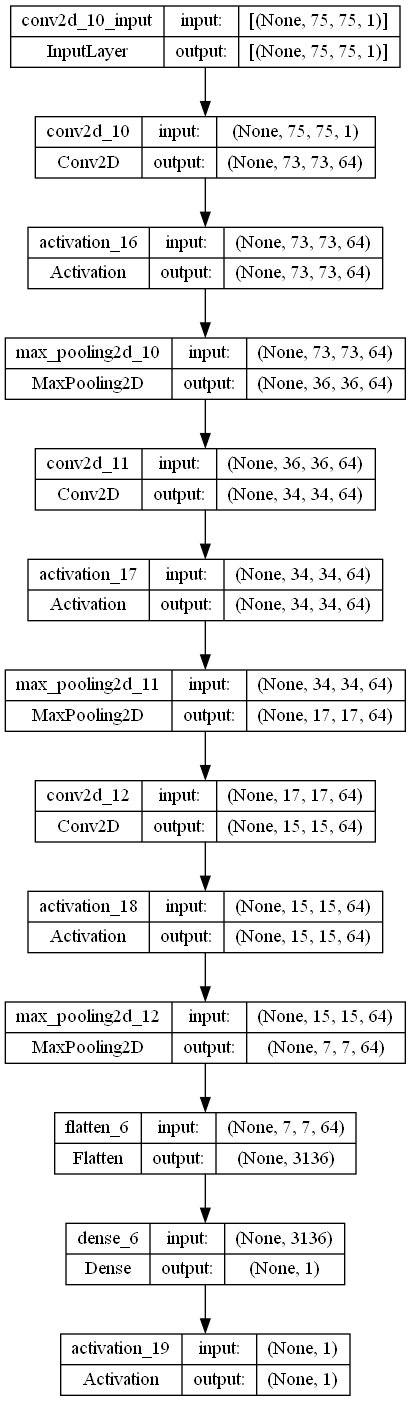

In [3]:
tf.keras.utils.plot_model(loaded_model, to_file='model_architecture.png', show_shapes=True)

In [4]:
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 73, 73, 64)        640       
                                                                 
 activation_16 (Activation)  (None, 73, 73, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 34, 34, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                 

In [10]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
X = np.array(X)
y = np.array(y)

dense_layers = [0]
layer_sizes = [256]
conv_layers = [3, 4]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f"{int(time.time())}-conv-{conv_layer}-nodes-{layer_size}-dense-{dense_layer}"
            print(NAME)
            layer = 0
            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:], name=f"input_layer{layer}"))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                layer += 1
                model.add(Conv2D(layer_size, (3, 3), name=f"layer{layer}"))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                layer += 1
                model.add(Dense(layer_size, name=f"layer{layer}"))
                model.add(Activation('relu'))
            layer += 1
            model.add(Dense(1, name=f"output_layer{layer}"))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1, callbacks=[tensorboard])
            model.save(f"{NAME}.model")

1677714076-conv-3-nodes-256-dense-0
Epoch 1/10
696/696 [==============================] - 31s 42ms/step - loss: 0.6500 - accuracy: 0.6096 - val_loss: 0.6013 - val_accuracy: 0.6739
Epoch 2/10
696/696 [==============================] - 25s 36ms/step - loss: 0.5121 - accuracy: 0.7503 - val_loss: 0.4788 - val_accuracy: 0.7681
Epoch 3/10
696/696 [==============================] - 24s 35ms/step - loss: 0.4306 - accuracy: 0.8018 - val_loss: 0.4473 - val_accuracy: 0.7891
Epoch 4/10
696/696 [==============================] - 27s 38ms/step - loss: 0.3743 - accuracy: 0.8314 - val_loss: 0.3862 - val_accuracy: 0.8242
Epoch 5/10
696/696 [==============================] - 25s 36ms/step - loss: 0.3278 - accuracy: 0.8548 - val_loss: 0.3715 - val_accuracy: 0.8246
Epoch 6/10
696/696 [==============================] - 26s 37ms/step - loss: 0.2842 - accuracy: 0.8772 - val_loss: 0.3662 - val_accuracy: 0.8364
Epoch 7/10
696/696 [==============================] - 25s 35ms/step - loss: 0.2493 - accuracy: 0.893

INFO:tensorflow:Assets written to: 1677714076-conv-3-nodes-256-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677714076-conv-3-nodes-256-dense-0.model\assets


1677714336-conv-4-nodes-256-dense-0
Epoch 1/10
696/696 [==============================] - 27s 38ms/step - loss: 0.6827 - accuracy: 0.5666 - val_loss: 0.6650 - val_accuracy: 0.6036
Epoch 2/10
696/696 [==============================] - 26s 37ms/step - loss: 0.6256 - accuracy: 0.6491 - val_loss: 0.6005 - val_accuracy: 0.6921
Epoch 3/10
696/696 [==============================] - 26s 37ms/step - loss: 0.5366 - accuracy: 0.7283 - val_loss: 0.4875 - val_accuracy: 0.7640
Epoch 4/10
696/696 [==============================] - 26s 37ms/step - loss: 0.4578 - accuracy: 0.7823 - val_loss: 0.4918 - val_accuracy: 0.7681
Epoch 5/10
696/696 [==============================] - 25s 37ms/step - loss: 0.3999 - accuracy: 0.8178 - val_loss: 0.4239 - val_accuracy: 0.8101
Epoch 6/10
696/696 [==============================] - 26s 37ms/step - loss: 0.3521 - accuracy: 0.8435 - val_loss: 0.3945 - val_accuracy: 0.8218
Epoch 7/10
696/696 [==============================] - 26s 37ms/step - loss: 0.3038 - accuracy: 0.868

INFO:tensorflow:Assets written to: 1677714336-conv-4-nodes-256-dense-0.model\assets


INFO:tensorflow:Assets written to: 1677714336-conv-4-nodes-256-dense-0.model\assets


In [11]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
X = np.array(X)
y = np.array(y)

In [12]:
loaded_model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
696/696 [==============================] - 8s 10ms/step - loss: 0.2271 - accuracy: 0.9076 - val_loss: 0.3593 - val_accuracy: 0.8477
Epoch 2/10
696/696 [==============================] - 7s 10ms/step - loss: 0.2124 - accuracy: 0.9128 - val_loss: 0.3802 - val_accuracy: 0.8408
Epoch 3/10
696/696 [==============================] - 7s 10ms/step - loss: 0.1818 - accuracy: 0.9292 - val_loss: 0.4568 - val_accuracy: 0.8400
Epoch 4/10
696/696 [==============================] - 7s 10ms/step - loss: 0.1638 - accuracy: 0.9343 - val_loss: 0.4184 - val_accuracy: 0.8392
Epoch 5/10
696/696 [==============================] - 7s 10ms/step - loss: 0.1527 - accuracy: 0.9392 - val_loss: 0.4036 - val_accuracy: 0.8493
Epoch 6/10
696/696 [==============================] - 7s 10ms/step - loss: 0.1292 - accuracy: 0.9508 - val_loss: 0.4217 - val_accuracy: 0.8428
Epoch 7/10
696/696 [==============================] - 7s 10ms/step - loss: 0.1115 - accuracy: 0.9568 - val_loss: 0.4146 - val_accuracy: 0.8537

In [ ]:
nodes = 64

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
with tf.device('/GPU:0'):
    loaded_model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
502/696 [====================>.........] - ETA: 1s - loss: 0.0413 - accuracy: 0.9855

KeyboardInterrupt: 